# A little statistics




In [38]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import scipy
from scipy import stats

In [44]:
#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (20,15)
d = stats.norm.cdf(-1) #Finds the specific cumulative probablity associated with sigma
print(d)
p =  stats.norm.ppf(0.1) #Finds the sigma associated to the probablity
print(p)

0.15865525393145707
-1.2815515655446004


The normal standard probablity of 1 sigma is 84%, and the sigma associated with a measurement of 10% is -1.28. Both measurements line up with data from the z-table. A negative sigma value just means that the cumulative normal distribution was summed to the left of the mean. 

## Lognormal Distribution
The lognormal distribution is a continuous probability distribution of a random variable whose logarithm is normally distributed. In python, the lognorm distribution takes in a shape parameter named s that determines the shape of the distribution. 

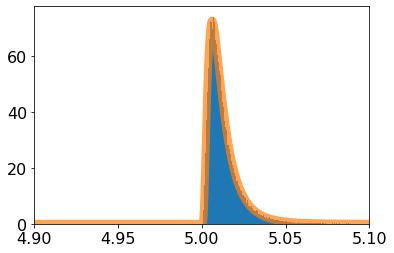

In [35]:
s = 0.7 # shape parameter
d = stats.lognorm.rvs(s, loc = 5., scale = 0.01, size = 100000)

fig, ax = plt.subplots(1, 1)
ax.hist(d,500, density=True)
plt.tick_params(labelsize = 16)
plt.xlim([4.90,5.10])
x = np.linspace(4.90,5.10,1000)
ax.plot(x,stats.lognorm.pdf(x, s, loc = 5., scale = 0.01),linewidth = 8,alpha = 0.7)
plt.show()

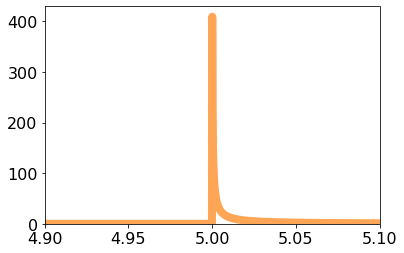

In [33]:
s = 3 # shape parameter
d = stats.lognorm.rvs(s, loc = 5., scale = 0.01, size = 100000)

fig, ax = plt.subplots(1, 1)
ax.hist(d,500, density=True)
plt.tick_params(labelsize = 16)
plt.xlim([4.90,5.10])
x = np.linspace(4.90,5.10,1000)
ax.plot(x,stats.lognorm.pdf(x, s, loc = 5., scale = 0.01),linewidth = 8,alpha = 0.7)
plt.show()

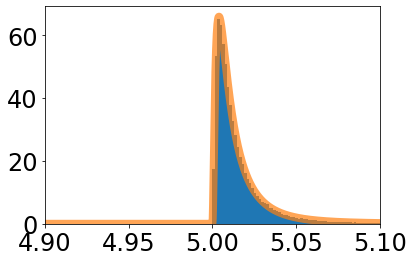

In [34]:
s = 0.954 # shape parameter
d = stats.lognorm.rvs(s, loc = 5., scale = 0.01, size = 100000)

fig, ax = plt.subplots(1, 1)
ax.hist(d,500, density=True)
plt.tick_params(labelsize = 16)
plt.xlim([4.90,5.10])
x = np.linspace(4.90,5.10,1000)
ax.plot(x,stats.lognorm.pdf(x, s, loc = 5., scale = 0.01),linewidth = 8,alpha = 0.7)
plt.show()

The nature of the shape parameter is that the higher the value of the shape parameter the tighter the peak. The overall distribution expands as the shape parameter get smaller.

## Signal-free data
Hypothetical Measurement: 5.05

What is the probability of my distribution making a mistake, and giving off a false positive - signal like data. Which means what is the probability that a given sample is less than or equal to 5.05.

In [94]:
integral = stats.lognorm.cdf(5.05,s, loc=5, scale = 0.01)
print(integral)
sigma =  stats.norm.ppf(integral)
print(sigma)

0.9542023461896624
1.687041836933016


The sigma values always follow that of a standardized normal distributions, and don't directly apply to the lognormal distribution. But from this we can conclude the probability for 

## Non-continuous distribution (Poisson)

The poisson distribution is a discrete probability distribution that expresses the probability of a given number of events occurring in a fixed interval of time or space. It is the limiting case of the binomial in the case that the probability is very low.The varying parameter in this case is mu, which is the definitive shape parameter of the poisson distribution. With a mu of 1 we have a stair case shape.

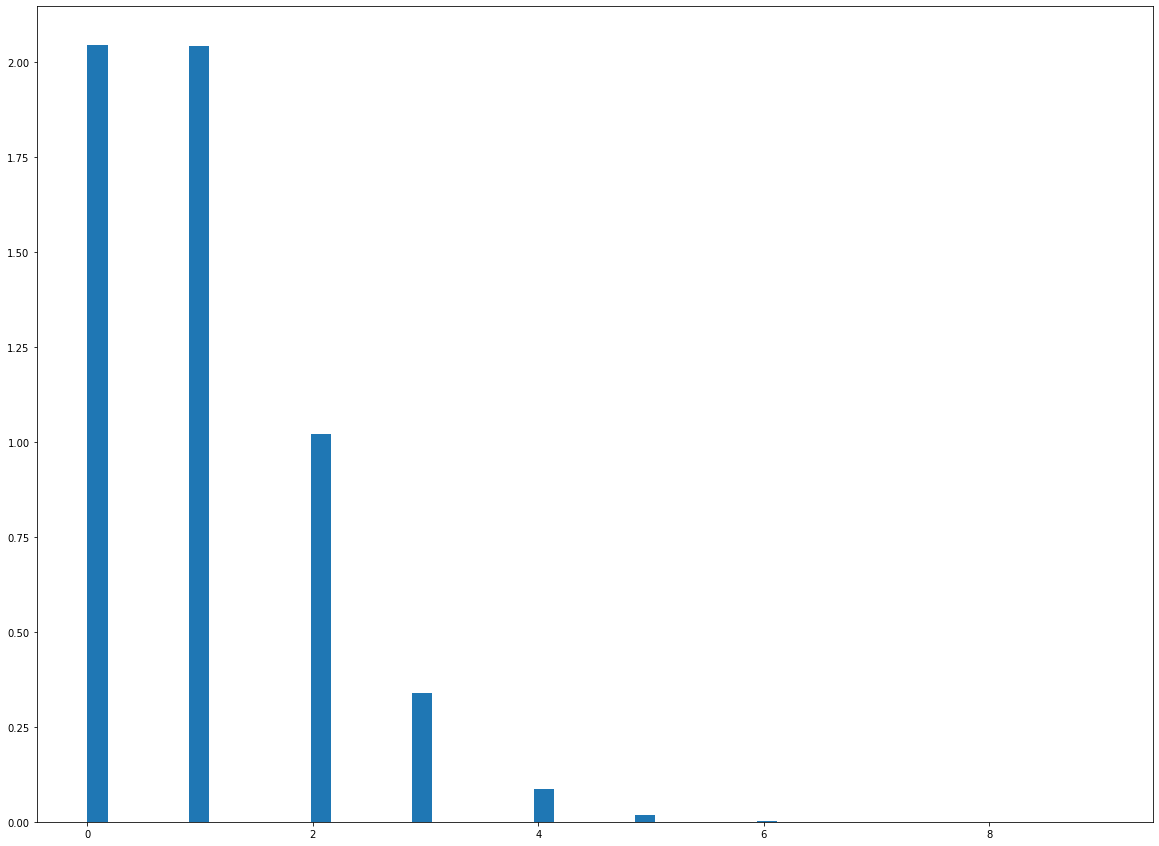

In [134]:
mu = 1

d = stats.poisson.rvs(mu, loc=0, size=1000000, random_state=None)
fig, ax = plt.subplots(1, 1)
ax.hist(d,50, density=True)
plt.show()

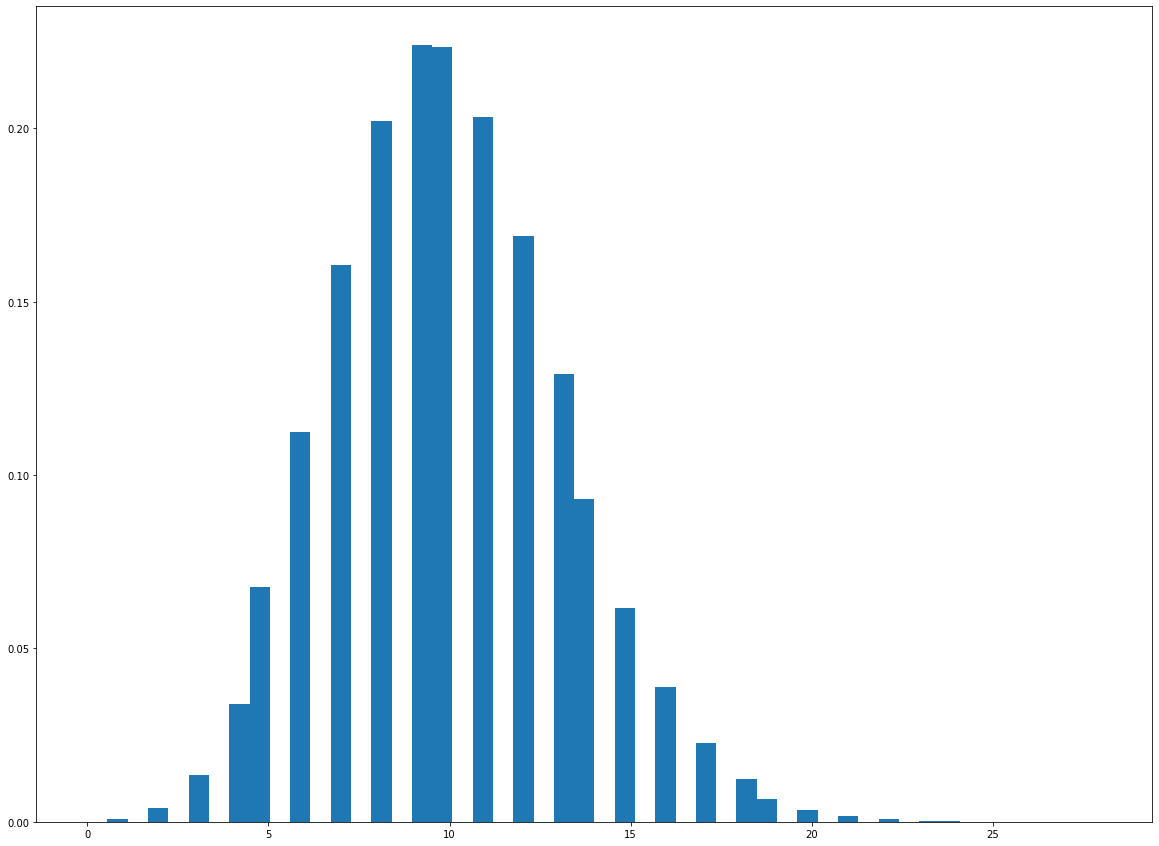

In [135]:
mu = 10

d = stats.poisson.rvs(mu, loc=0, size=1000000, random_state=None)
fig, ax = plt.subplots(1, 1)
ax.hist(d,50, density=True)
plt.show()

A mu of 10 gives us an interval based normal like distribution.

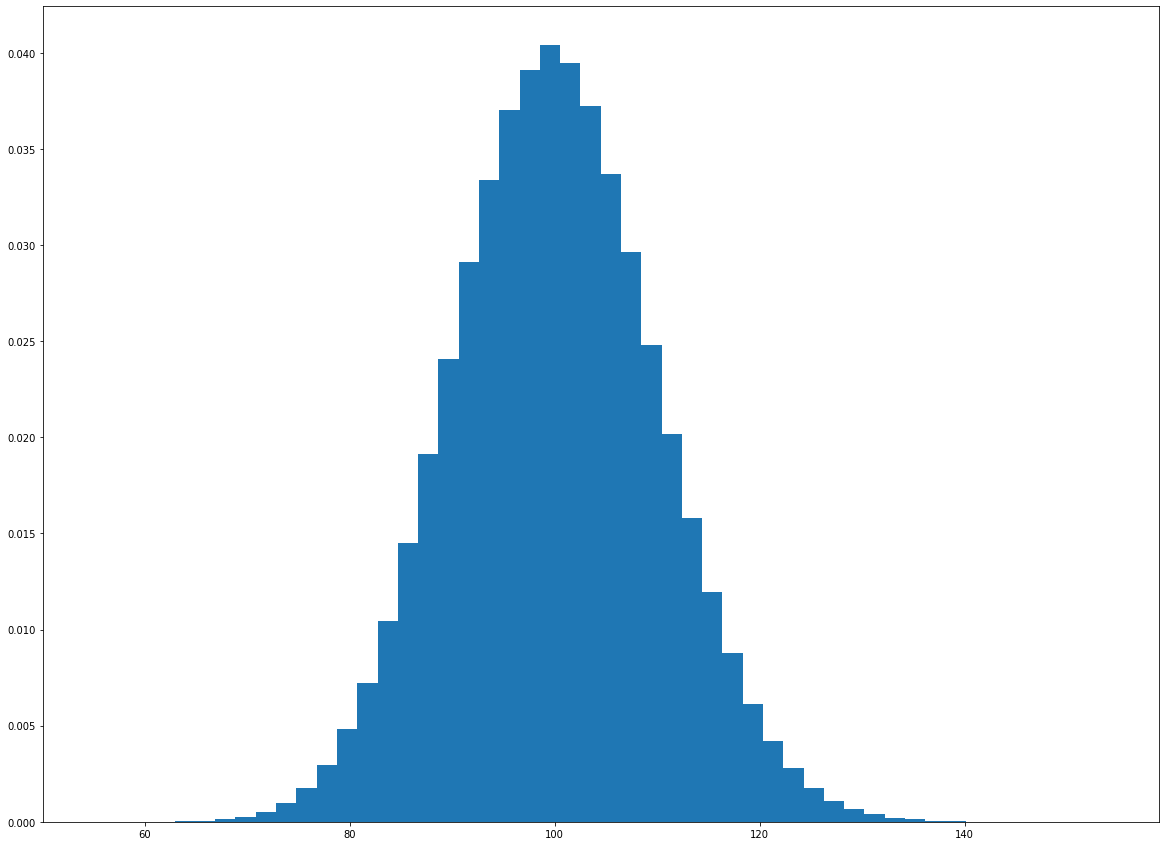

In [148]:
mu = 100

d = stats.poisson.rvs(mu, loc=0, size=1000000, random_state=None)
fig, ax = plt.subplots(1, 1)
ax.hist(d,50, density=True)
plt.show()

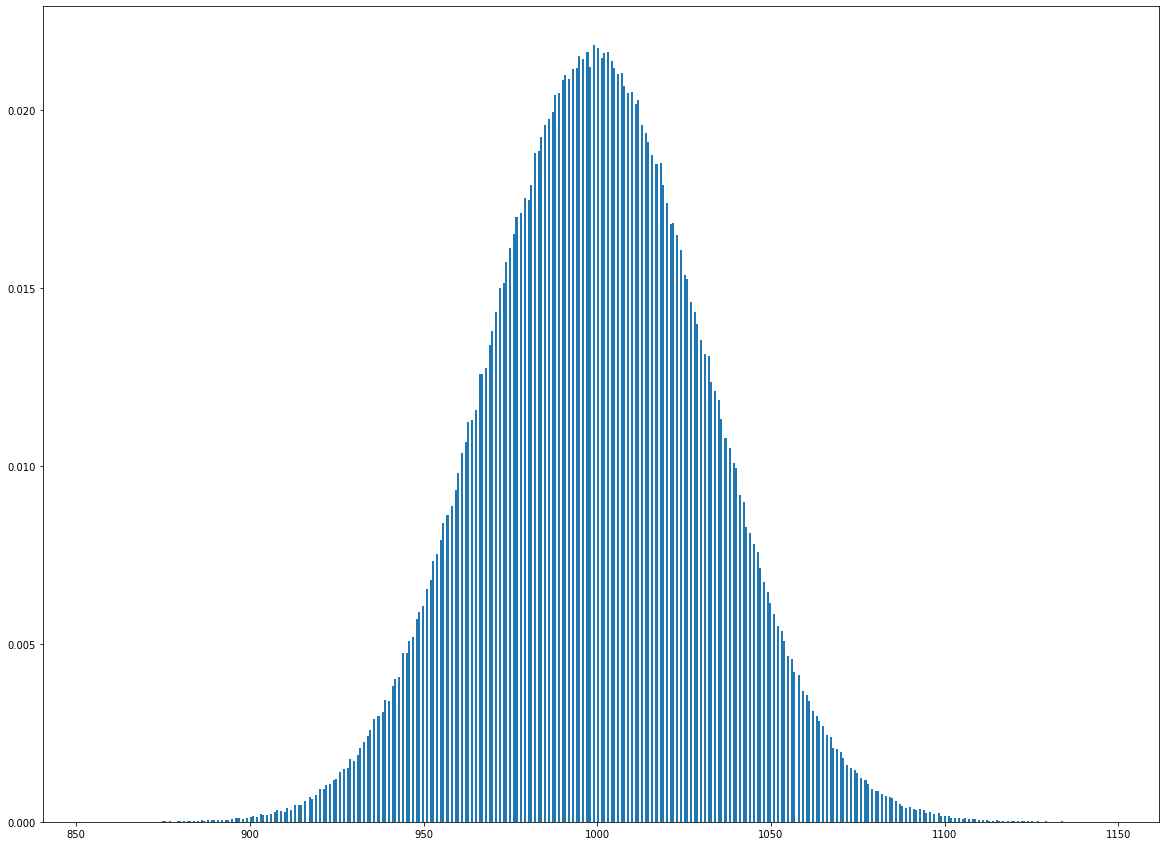

In [45]:
mu = 1000

d = stats.poisson.rvs(mu, loc=0, size=1000000, random_state=None)
fig, ax = plt.subplots(1, 1)
ax.hist(d,500, density=True)
plt.show()

Finally, at mu = 1000, we have something that pretty accurately resembles a normal distribution. It is key to note that as mu increases, the mean and standard deviation also increase, while the y-axis shrinks. 

Hypothetical Measurement: 1075

What is the probability of my distribution making a mistake, and giving off a false positive for signal like data, at the right edge of the poisson distribution. 

In [156]:
print(mu)
integral = stats.poisson.cdf(1075,mu, loc=0)
print(integral)
sigma =  stats.norm.ppf(integral)
print(sigma)

1000
0.9909506075220879
2.3635909220808133


Since the probabilities and sigma are discrete, we can always understand any distribution under a standardized normal distribution. 
Since the parameters are not discrete, and they cause the data to vary wildly, we need to choose the correct parameters to represent the data.
The only thing that can be held constant is the inputted mu parameter, which in turn changes everything about the distribution. The mu parameter is discrete for a signle iteration of a poisson distribution. But with a varying mu parameter the mean, standard variation, x and y axis vary as mu changes. 
In that case, a discrete probability describes the probability of occurrence of each value of a discrete random variable.
